# Regression interpretation

Let's consider how adjustment works in regression by considering a so called ANCOVA (analysis of covariance) setting. Imagine, there's treatment variable that we're ineterested in, $T_i$, and a regression variable that we have to adjust for, $X_i$. Consider this specific variation of this setting: 

$$
Y_i = \beta_0 + \beta_1 X_i + \beta_2 T_i + \epsilon_i
$$

To tie ourselves down with a context, consider $Y_i$ is blood pressure, $T_i$ is a medication and $X_i$ is BMI. Let's look at different settings that could arise using plots.

Since I'm going to be making the same plot over and over, I defined a function that

1. fit the ANCOVA model using sklearn
2. plotted the data as $X$ versus $Y$ with orange versus blue for treated versus not
3. added the fitted ANCOVA lines plus the marginal means (the means for each group disregarding $X$) as horizontal lines

Note, the adjusted estimated treatment effect is the difference between the two parallel sloped lines. The unadjusted estimated treatment effect is the difference between the two horizontal lines. Let's look at how adjustment changes things depending on the setting. First we'll do our imports and then define a function that will make our plot for us and fit the ANCOVA model.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import copy

sns.set()


In [2]:
def myplot(x, y, t):
    x1 = x[t == 1]
    x0 = x[t == 0]
    y1 = y[t == 1]
    y0 = y[t == 0]
    xm1 = np.mean(x1)
    xm0 = np.mean(x0)
    ym1 = np.mean(y1)
    ym0 = np.mean(y0)

    X = np.array([x, t]).transpose()
    out = LinearRegression().fit(X, y)
    b0hat = out.intercept_
    b1hat = out.coef_[0]
    b2hat = out.coef_[1]
    
    plt.scatter(x0, y0)
    plt.scatter(x1, y1)

    col = sns.color_palette()

    plt.axhline(y = ym0, c = col[0])
    plt.axhline(y = ym1, c = col[1])

    xlim = [np.min(x), np.max(x)]

    ylim0 = [z * b1hat + b0hat + b2hat for z in xlim]
    ylim1 = [z * b1hat + b0hat         for z in xlim]

    plt.plot( xlim, ylim1)
    plt.plot( xlim, ylim0) 

    plt.show()

Let's consider out model with $\beta_0 = 0$, $\beta_1 = 1$ and $\beta_2 = 4$. So the treated have an intercept 4 units higher. Let's consider simulating from this model where the treatment is randomized.

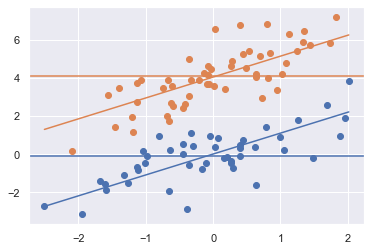

In [3]:
n = 100
x = np.random.normal(size = n)
e = np.random.normal(size = n)
t = np.random.binomial(1, .5, n)

beta0 = 0
beta1 = 1
beta2 = 4

y = beta0 + beta1 * x + beta2 * t + e

myplot(x, y, t)

Notice that the marginal means (horizontal lines) are about 4 units appart, same as the lines. This is due to the randomization. A goal of randomization is to make our inference for the treatment unrelated to whether or not we adjust for the confounding variable ($X$). So, we get (up to random error) the ssame answer whether we adjust for $X$ or not. Let's consider a different setting.

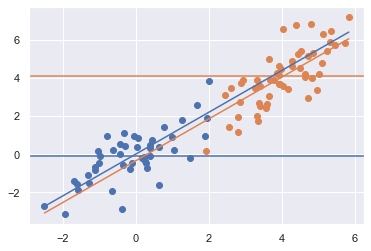

In [4]:
myplot(x + t * 4, y, t)


Now notice that there is a large unadjusted difference (difference between the horizontal lines) whereas there is not much of a difference between the lines. That is, when adjusting for $X$, the relationship goes away. Of note, treatment assignment is highly related to the $X$ variable. Orange dots tend to have a larger $X$ value than the blue. Because of this, there's pratically no area of overlap between the orange and the blue to directly compare them. The adjusted model is all model, extrapolating the blue line up to the orange and the orange down to the blue assuming that they're parallel.

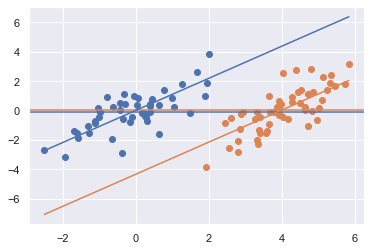

In [5]:
myplot(x + t * 4, y  - t * 4, t)

Above notice that the result is the reverse. There's little association marginally, but a large one when conditioning. Let's look at one final case.

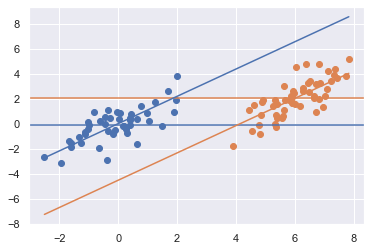

In [6]:
myplot(x + t * 6, y  - t * 2, t)


Above things are even worse, the relationship has reversed itself. The marginal association is that the orange is above the blue whereas the conditional association is that the blue is above the orange. That is, if you fit the treatment model without $X$ you get one answer, and with $X$ you get the exact opposite answer! This is an example of so-called "Simpsons paradox". The "paradox" isn't that paradoxical. It simply says the relationship between two variables could reverse itself when factoring in another variable. Once again, note there's no overlap in the distributions.